In [54]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from tqdm import tqdm 
import math

In [55]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [56]:
X.shape, y.shape

((50000, 15), (50000,))

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [59]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [60]:
from sklearn import linear_model

In [61]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [62]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.793932, T: 262500, Avg. loss: 0.379096
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.820446, T: 300000, Avg. loss: 0.378826
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.840093, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [63]:
import inspect
print(inspect.getsource(clf.fit))

    def fit(self, X, y, coef_init=None, intercept_init=None,
            sample_weight=None):
        """Fit linear model with Stochastic Gradient Descent.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            Training data

        y : numpy array, shape (n_samples,)
            Target values

        coef_init : array, shape (n_classes, n_features)
            The initial coefficients to warm-start the optimization.

        intercept_init : array, shape (n_classes,)
            The initial intercept to warm-start the optimization.

        sample_weight : array-like, shape (n_samples,), optional
            Weights applied to individual samples.
            If not provided, uniform weights are assumed. These weights will
            be multiplied with class_weight (passed through the
            constructor) if class_weight is specified

        Returns
        -------
        self : returns an instance of self.
   

In [64]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42328902,  0.18380407, -0.14437354,  0.34064016, -0.21316099,
          0.56702655, -0.44910569, -0.09094413,  0.21219292,  0.17750247,
          0.19931732, -0.00506998, -0.07781235,  0.33343476,  0.0320374 ]]),
 (1, 15),
 array([-0.85032916]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [65]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
print("length is:", len(X_train))
l = len(X_train[0])

length is: 37500


In [18]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

In [74]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w)+b)))

def coefficients_SGD(x_train,x_test,y_train,y_test,n1):
    #Initialize the weight_vector and intercept term randomly
    weight_vector=np.random.normal(0,0.0001, size=(l))
    intercept=np.random.normal(0,0.0001)
    train_logloss=[]
    test_logloss=[]
    lamda  = 0.0001
    alpha = 0.0001
    
    for epoch in range(n1):
        for i in range(N):
            c1= (x_train[i]*(y_train[i]-sigmoid(weight_vector,x_train[i],intercept)))
            i1=(y_train[i]-sigmoid(weight_vector,x_train[i],intercept))
            weight_vector=((1-(alpha*lamda)/N)*weight_vector+(alpha*c1))
            intercept=((1-(alpha*lamda)/N)*intercept+(alpha*i1))
        ypredtrain= sigmoid(weight_vector,x_train,intercept)
        ypredtest= sigmoid(weight_vector,x_test,intercept)
        
        trainl=0
        testl=0
        
        for i in range(len(y_train)):
                trainl+=-((y_train[i]*(math.log(ypredtrain[i])))+ ((1-ypredtrain[i])*(math.log(1-ypredtrain[i]))))
                
                
        for j in range(len(y_test)):
                testl+=-((y_test[j]*(math.log(ypredtest[j])))+ ((1-y_test[j])*(math.log(1-ypredtest[j])))) 
        avgloss_train=trainl/len(y_train)
        train_logloss.append(avgloss_train)
        avgloss_test=testl/len(y_test)
        test_logloss.append(avgloss_test)
        print("epoch=",epoch,"; Loss train:",avgloss_train,"Loss_Test",avgloss_test)
    return weight_vector,intercept,train_logloss,test_logloss



coefficient, intercept, train_loss, test_los=coefficients_SGD(X_train,X_test,y_train,y_test,10)


epoch= 0 ; Loss train: 0.38910962830062634 Loss_Test 0.405144932852169
epoch= 1 ; Loss train: 0.37452877450474326 Loss_Test 0.3900537916867282
epoch= 2 ; Loss train: 0.3716349813295193 Loss_Test 0.3850045714927119
epoch= 3 ; Loss train: 0.37151945751769316 Loss_Test 0.3827285303400971
epoch= 4 ; Loss train: 0.37215353168056436 Loss_Test 0.3815831092877911
epoch= 5 ; Loss train: 0.37292102162155505 Loss_Test 0.3809753344371122
epoch= 6 ; Loss train: 0.3736247468956413 Loss_Test 0.3806433414830534
epoch= 7 ; Loss train: 0.37421162226812865 Loss_Test 0.3804587643922377
epoch= 8 ; Loss train: 0.3746799943655306 Loss_Test 0.3803549224721405
epoch= 9 ; Loss train: 0.37504515456596543 Loss_Test 0.38029598553169386


In [75]:
print("Coeficients:",coefficient)
print("\nIntercept=",intercept)




Coeficients: [-0.42318617  0.19105119 -0.14582608  0.33806202 -0.21202885  0.56534668
 -0.44534936 -0.09164072  0.21791671  0.16986409  0.19524251  0.00232859
 -0.07785289  0.33885891  0.02220089]

Intercept= -0.8505963354397917


GOAL: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [76]:
print(coefficient-clf.coef_)
print("\n",intercept-clf.intercept_)

[[ 1.02847938e-04  7.24711765e-03 -1.45253283e-03 -2.57814271e-03
   1.13213587e-03 -1.67986769e-03  3.75632155e-03 -6.96593950e-04
   5.72378216e-03 -7.63838204e-03 -4.07481081e-03  7.39856903e-03
  -4.05394448e-05  5.42415052e-03 -9.83650124e-03]]

 [-0.00026718]


In [77]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

1.6978933333333335
1.6986400000000001


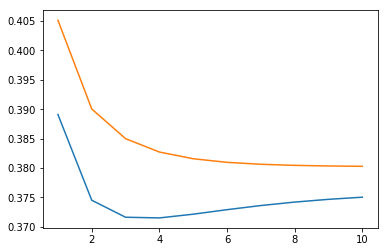

In [78]:
e = []
for i in range (0,10):
    e.append(i+1)
plt.plot(e,train_loss, label='Train')
plt.plot(e,test_los, label='Test')
